# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muh. Wira Ramdhani Fadhil
- **Email:** muhwira907@gmail.com
- **ID Dicoding:** wira27

## Menentukan Pertanyaan Bisnis

- Bagaimana kondisi musim dan cuaca tertentu mempengaruhi jumlah peminjaman sepeda?
- Bagaimana perbedaan peminjaman sepeda pada hari kerja dan bukan hari kerja?
- Bagaimana tren jumlah peminjaman sepeda dari waktu ke waktu?

## Import Semua Packages/Library yang Digunakan

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import MonthLocator, DateFormatter

## Data Wrangling
Pada submission ini saya hanya akan menggunakan data yang ada pada file **day.csv** karena data-data yang ada pada file tersebut sudah cukup untuk menjawab pertanyaan-pertanyaan bisnis yang saya ajukan di atas

### Gathering Data

Memuat tabel day

In [30]:
day_df = pd.read_csv('data\day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

#### Menilai Data day_df

Pertama, memeriksa informasi dari setiap kolom, seperti nama, non-null, dan tipe data

In [31]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan output dari kode di atas, ada beberapa hal yang perlu di perhatikan:
- Beberapa nama kolom yang dipakai kurang dapat dibaca, jadi kita perlu mengubahnya
- Terdapat masalah tipe data pada kolom **dteday**. Kolom tersebut seharusnya direpresentasikan dengan tipe data **datetime** bukan **object**

Selanjutnya, kita coba memeriksa sample data dari dataframe **day_df**

In [32]:
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
166,167,2011-06-16,2,0,6,0,4,1,2,0.628333,0.595346,0.688333,0.206471,545,3222,3767
521,522,2012-06-05,2,1,6,0,2,1,2,0.540833,0.525892,0.613333,0.209575,968,6033,7001
83,84,2011-03-25,2,0,3,0,5,1,1,0.264167,0.256312,0.495000,0.230725,300,1910,2210
470,471,2012-04-15,2,1,4,0,0,0,1,0.606667,0.573875,0.507917,0.225129,2846,4286,7132
687,688,2012-11-18,4,1,11,0,0,0,1,0.342500,0.337746,0.692917,0.227612,922,3747,4669
571,572,2012-07-25,3,1,7,0,3,1,1,0.724167,0.654054,0.450000,0.164800,1383,6790,8173
546,547,2012-06-30,3,1,6,0,6,0,1,0.765000,0.687508,0.601250,0.161071,1455,4232,5687
608,609,2012-08-31,3,1,8,0,5,1,1,0.764167,0.689400,0.587500,0.168533,1433,5917,7350
660,661,2012-10-22,4,1,10,0,1,1,1,0.487500,0.482942,0.568333,0.081483,830,6228,7058
724,725,2012-12-25,1,1,12,1,2,0,2,0.291304,0.294465,0.734783,0.168726,440,573,1013


Berdasarkan sample di atas, untuk kolom **season** dan **weathersit** masih menggunakan angka untuk merepresentasikan datanya. Hal ini dapat membuat data nya sulit dipahami saat membuat visualisasi. Oleh karena itu data pada kedua kolom tersebut akan diubah menjadi data berdasarkan file **readme.md** dari dataset nya.

Selanjutnya, memeriksa duplikasi data

In [33]:
print('Jumlah duplikasi: ', day_df.duplicated().sum())

Jumlah duplikasi:  0


Berdasarkan output di atas, tidak terdapat duplikasi data pada Dataframe **day_df**

Selanjutnya, memeriksa parameter statistik dari kolom numerik yang terdapat dalam day_df

In [34]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan output di atas, tidak terdapat kesalahan pada parameter statistik dari setiap kolom numerik

Jadi, dapat disimpulkan bahwa Dataframe **day_df** hanya memiliki beberapa masalah tipe data pada kolom **dteday**

### Cleaning Data

#### Membersihkan Data day_df

##### Mengubah nama kolom menjadi nama yang lebih mudah dibaca

In [35]:
day_df.rename(columns={
    'instant': 'record_id',
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'holiday': 'is_holiday',
    'weekday': 'day_of_week',
    'workingday': 'is_working_day',
    'temp': 'temperature',
    'atemp': 'feels_temperature',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'casual': 'casual_users_count',
    'registered': 'registered_users_count',
    'cnt': 'total_rentals'
}, inplace=True)

##### Menangani kesalahan tipe data untuk kolom **date** (**dteday**)

In [36]:
datetime_columns = ['date']

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

Kita coba periksa kembali informasi dari dataframe **day_df**

In [37]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   record_id               731 non-null    int64         
 1   date                    731 non-null    datetime64[ns]
 2   season                  731 non-null    int64         
 3   year                    731 non-null    int64         
 4   month                   731 non-null    int64         
 5   is_holiday              731 non-null    int64         
 6   day_of_week             731 non-null    int64         
 7   is_working_day          731 non-null    int64         
 8   weathersit              731 non-null    int64         
 9   temperature             731 non-null    float64       
 10  feels_temperature       731 non-null    float64       
 11  humidity                731 non-null    float64       
 12  wind_speed              731 non-null    float64   

Dapat dilihat pada output di atas, nama-nama kolom nya lebih mudah dibaca dan tipe data pada kolom **date** telah berubah menjadi **datetime**

##### Mengubah nilai kolom **season** dan **weathersit**

In [38]:
# Mengubah nilai kolom 'season' menjadi string
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season'] = day_df['season'].map(season_mapping)

# Mengubah nilai kolom 'weathersit' menjadi string
weathersit_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'}
day_df['weathersit'] = day_df['weathersit'].map(weathersit_mapping)

Untuk melihat hasilnya kita bisa mengambil beberapa data sample dari dataframe nya

In [39]:
day_df.sample(10)

,record_id,date,season,year,month,is_holiday,day_of_week,is_working_day,weathersit,temperature,feels_temperature,humidity,wind_speed,casual_users_count,registered_users_count,total_rentals
24,25,2011-01-25,Spring,0,1,0,2,1,Mist,0.223478,0.234526,0.616957,0.129796,186,1799,1985
507,508,2012-05-22,Summer,1,5,0,2,1,Mist,0.615000,0.580825,0.765833,0.118167,819,5254,6073
602,603,2012-08-25,Fall,1,8,0,6,0,Mist,0.661667,0.618696,0.712917,0.244408,1829,4224,6053
517,518,2012-06-01,Summer,1,6,0,5,1,Mist,0.654167,0.607962,0.755417,0.237563,533,3594,4127
84,85,2011-03-26,Summer,0,3,0,6,0,Clear,0.265833,0.257571,0.394167,0.209571,981,1515,2496
420,421,2012-02-25,Spring,1,2,0,6,0,Clear,0.290833,0.255675,0.395833,0.421642,317,2415,2732
51,52,2011-02-21,Spring,0,2,1,1,0,Mist,0.303333,0.284075,0.605000,0.307846,195,912,1107
423,424,2012-02-28,Spring,1,2,0,2,1,Clear,0.359167,0.353525,0.395833,0.193417,229,4134,4363
665,666,2012-10-27,Winter,1,10,0,6,0,Mist,0.530000,0.515133,0.720000,0.235692,2643,5209,7852
122,123,2011-05-03,Summer,0,5,0,2,1,Mist,0.616667,0.582079,0.697083,0.342667,603,3848,4451


## Exploratory Data Analysis (EDA)

#### Explorasi Data day_df

##### Total peminjaman sepeda

In [40]:
total_rentals = day_df['total_rentals'].sum()
print('Total Peminjaman:', total_rentals)

Total Peminjaman: 3292679


Bisa dilihat dari outputnya bahwa totalnya adalah 3.292.679 kali peminjaman sepeda

##### Statistik peminjaman sepeda pada setiap musim

In [41]:
# parameter statistik untuk jumlah peminjaman sepeda pada setiap musim
day_df.groupby(by='season').agg({
   'total_rentals': ['count', 'max', 'min', 'std', 'sum']
})

total_rentals                                  
               count   max   min          std      sum
season                                                
Fall             188  8714  1115  1459.800381  1061129
Spring           181  7836   431  1399.942119   471348
Summer           184  8362   795  1695.977235   918589
Winter           178  8555    22  1699.615261   841613

Dari statistik di atas ada beberapa hal yang bisa kita ketahui:
- Rata-rata peminjaman sepeda terbanyak terjadi pada musim gugur (fall) dengan 5.644 peminjaman, sementara rata-rata peminjaman sepeda paling sedikit terjadi pada musim semi (spring) dengan 2.604 peminjaman.
- Rentang peminjaman sepeda untuk setiap musim memiliki perbedaan yang cukup signifikan antara nilai minimum dan maksimum.
- Musim panas (summer) dan dingin (winter) memiliki standar deviasi yang tinggi dibanding musim lainnya, yang menunjukkan bahwa kedua musim tersebut memiliki variabilitas yang lebih besar.
- Musim semi (fall) dan panas (summer) cenderung memiliki jumlah peminjaman sepeda yang lebih tinggi dibandingkan dengan musim semi (spring) dan dingin (winter), yang mencerminkan pengaruh musim tertentu terhadap pola peminjaman sepeda. Namun, kita juga perlu mempertimbangkan faktor lain seperti kondisi cuaca dan suhu dalam mengevaluasi pola tersebut secara lebih komprehensif.

##### Statistik peminjaman sepeda pada hari kerja dan bukan hari kerja

In [44]:
# parameter statistik untuk jumlah peminjaman sepeda pada hari kerja dan bukan hari kerja
statistics = day_df.groupby(by='is_working_day').agg({
    'total_rentals': ['count', 'mean', 'max', 'min', 'std', 'sum']
})
statistics.rename(index={0: 'Not Working Day', 1: 'Working Day'}, inplace=True)
print(statistics)

                total_rentals                                              
                        count         mean   max  min          std      sum
is_working_day                                                             
Not Working Day           231  4330.168831  8714  605  2052.141245  1000269
Working Day               500  4584.820000  8362   22  1878.415583  2292410


Dari statistik di atas, kita dapat melihat bahwa:

- Rata-rata jumlah peminjaman sepeda pada hari kerja (4.584) sedikit lebih tinggi dibanding pada bukan hari kerja (4.330)
- Rentang nilai pada hari kerja (22 hingga 8.362) lebih besar dibandingkan dengan pada bukan hari kerja (605 hingga 8.714), menunjukkan variasi yang lebih luas dalam jumlah peminjaman sepeda pada hari kerja.
- Standar deviasi pada bukan hari kerja lebih tinggi dibandingkan dengan hari kerja, yang menunjukkan variabilitas yang lebih besar dalam jumlah peminjaman sepeda pada bukan hari kerja.
- Jumlah peminjaman pada hari kerja (2.292.410) jauh lebih banyak dibanding pada bukan hari kerja (1.000.269).

##### Statistik peminjaman sepeda pada setiap kondisi cuaca

In [46]:
# parameter statistik untuk jumlah peminjaman sepeda pada setiap kondisi cuaca
day_df.groupby(by='weathersit').agg({
  'total_rentals': ['count', 'mean', 'max', 'min', 'std', 'sum']
})

total_rentals                                              
                   count         mean   max  min          std      sum
weathersit                                                            
Clear                463  4876.786177  8714  431  1879.483989  2257952
Light Snow            21  1803.285714  4639   22  1240.284449    37869
Mist                 247  4035.862348  8362  605  1809.109918   996858

Dari statistik di atas ada beberapa hal yang bisa kita ketahui:
- Rata-rata peminjaman sepeda terbanyak terjadi ketika cuaca sedang cerah (clear) dengan rata-rata 4.876 pinjaman.
- Rentang peminjaman sepeda untuk setiap cuaca memiliki perbedaan yang cukup signifikan antara nilai minimum dan maksimum.
- Cuaca cerah (clear) dan berkabut (mist) memiliki standar deviasi yang tinggi dibanding cuaca salju ringan (light snow), yang menunjukkan bahwa kedua cuaca tersebut memiliki variabilitas yang lebih besar.
- Peminjaman sepeda terbanyak terjadi ketika cuaca sedang cerah (clear) dengan jumlah 2.257.952 pinjaman, sangat jauh dibanding cuaca lainnya.

##### Statistik peminjaman sepeda setiap bulan

In [94]:
monthly_stats = day_df.resample('MS', on='date')['total_rentals'].agg(['count', 'mean', 'max', 'min', 'std', 'sum'])

monthly_stats.index = monthly_stats.index.to_period('M')
monthly_stats.index = monthly_stats.index.strftime('%b %Y')
monthly_stats.rename(columns={'count': 'day'}, inplace=True)

monthly_stats


,day,mean,max,min,std,sum
date,,,,,,
Jan 2011,31,1231.903226,1985,431,372.432665,38189
Feb 2011,28,1721.964286,2927,1005,398.508839,48215
Mar 2011,31,2065.967742,3239,605,550.971716,64045
Apr 2011,30,3162.333333,5312,795,1042.093593,94870
May 2011,31,4381.322581,5805,2633,572.927883,135821
Jun 2011,30,4783.733333,5515,3767,444.447812,143512
Jul 2011,31,4559.387097,6043,3285,680.090762,141341
Aug 2011,31,4409.387097,5895,1115,809.852401,136691
Sep 2011,30,4247.266667,5423,1842,965.377251,127418


Kode di atas menghasilkan statistik untuk setiap bulan dari bulan Januari 2011 sampai Desember 2012. Dari statistik di atas ada beberapa hal yang bisa kita ketahui:
- Rata-rata serta jumlah peminjaman sepeda terbanyak terjadi pada bulan September 2012 dengan rata-rata 7.285 peminjaman dan total 218.573 peminjaman.
- Jumlah peminjaman paling banyak dalam satu hari terjadi pada bulan September 2012 (8.714) dan di bulan tersebut juga terjadi jumlah peminjaman paling sedikit dalam satu hari (22)
- Standar deviasi tertinggi terjadi pada bulan Oktober 2012, yang menunjukkan bahwa pada bulan tersebut memiliki variabilitas yang besar antar harinya.

## Visualization & Explanatory Analysis

### Bagaimana kondisi musim dan cuaca tertentu mempengaruhi jumlah peminjaman sepeda?

Pengaruh musim tertentu terhadap jumlah peminjaman sepeda

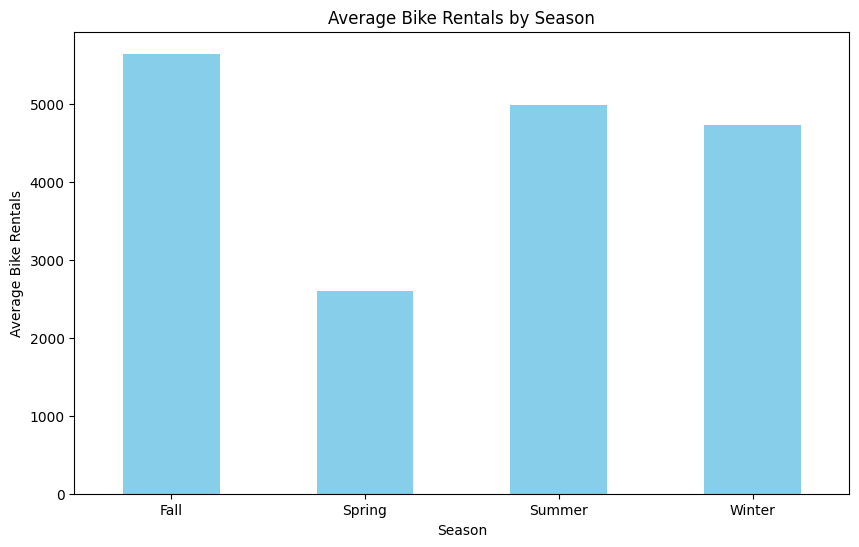

In [63]:
plt.figure(figsize=(10, 6))
day_df.groupby('season')['total_rentals'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Bike Rentals')
plt.xticks(rotation=0)
plt.show()

Explanatory analysis:
Musim gugur memiliki jumlah rata-rata penyewaan sepeda tertinggi, diikuti dekat oleh musim panas dan musim dingin, sedangkan musim semi memiliki penyewaan yang jauh lebih sedikit. Ini dapat menunjukkan bahwa orang lebih suka menyewa sepeda saat cuaca sejuk tetapi tidak terlalu dingin, menghindari musim semi saat cuaca dapat tidak menentu atau hujan.

Pengaruh cuaca tertentu terhadap jumlah peminjaman sepeda

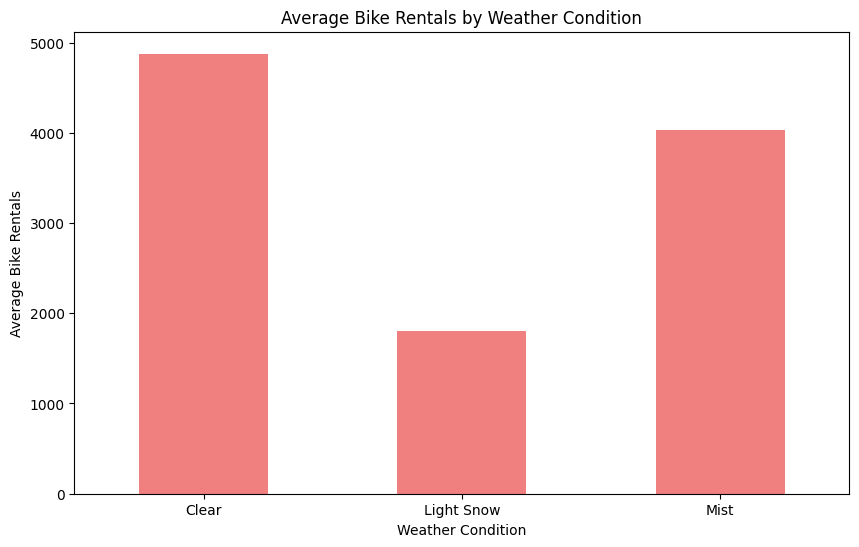

In [73]:
plt.figure(figsize=(10, 6))
day_df.groupby('weathersit')['total_rentals'].mean().plot(kind='bar', color='lightcoral')
plt.title('Average Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Bike Rentals')
plt.xticks(rotation=0)
plt.show()

Explanatory analysis: Cuaca cerah memiliki rata-rata penyewaan sepeda tertinggi, mendekati 5000. Diikuti cuaca berkabut dengan rat-rata peminjaman 4000. Dan rata-rata peminjaman sepeda terendah saat salju ringan. Ini dapat menunjukkan bahwa orang lebih suka menyewa sepeda saat cuaca cerah dan tidak terlalu ekstrem, menghindari salju ringan yang dapat menyulitkan berkendara

### Bagaimana perbedaan peminjaman sepeda pada hari kerja dan bukan hari kerja?

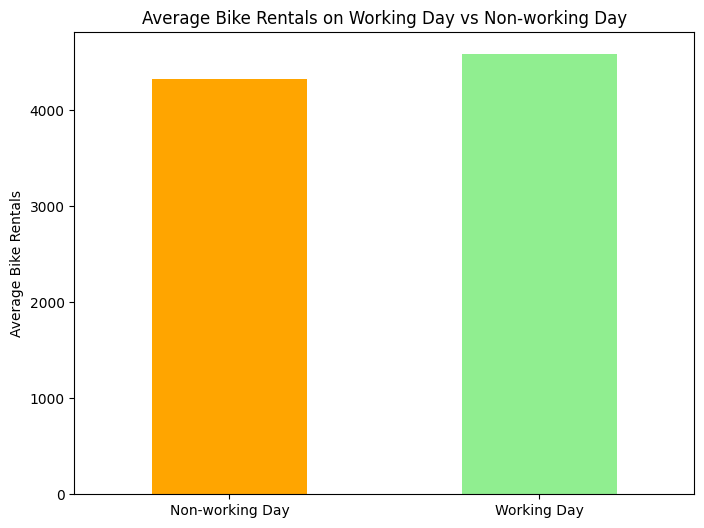

In [71]:
plt.figure(figsize=(8, 6))
day_df.groupby('is_working_day')['total_rentals'].mean().plot(kind='bar', color=['orange', 'lightgreen'])
plt.title('Average Bike Rentals on Working Day vs Non-working Day')
plt.xlabel('')
plt.ylabel('Average Bike Rentals')
plt.xticks(ticks=[0, 1], labels=['Non-working Day', 'Working Day'], rotation=0)
plt.show()

Explanatory analysis: Rata-rata penyewaan pada hari kerja lebih banyak tinggi dibanding pada bukan hari kerja. Ini dapat disebabkan beberapa orang mungkin lebih memilih bersepada ke kantor ataupun ke sekolah/kuliah. Pada bukan hari kerja. orang mungkin lebih memilih tetap bersantai di rumah atau berpergian menggunakan transportasi umum/pribadi.

### Bagaimana tren jumlah peminjaman sepeda dari waktu ke waktu?

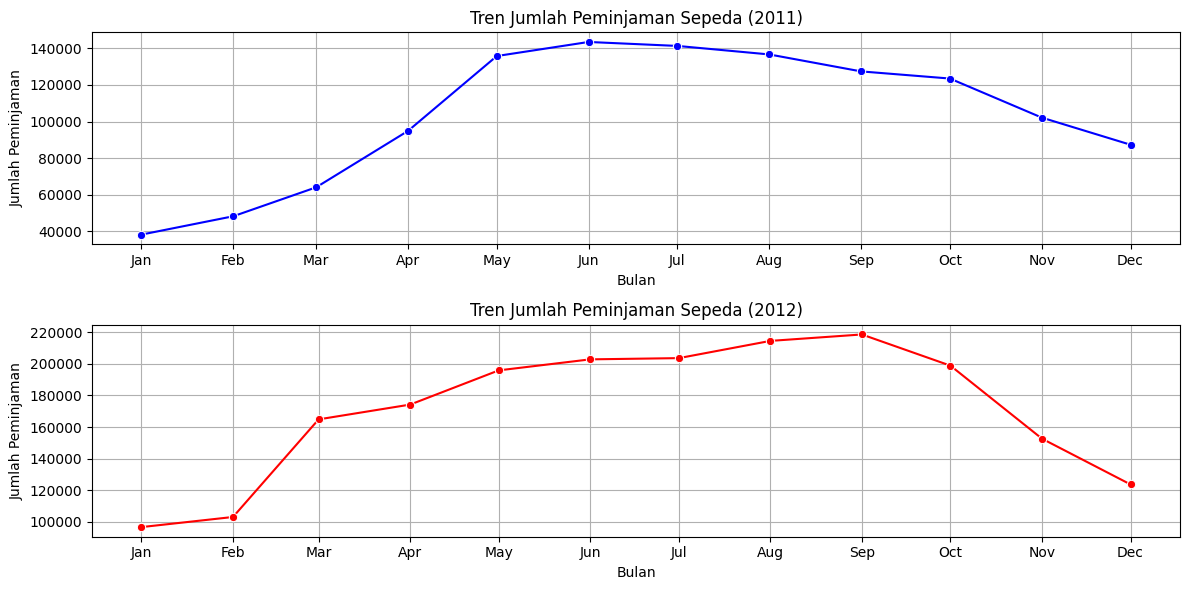

In [97]:
# Filter data untuk tahun 2011 dan 2012
df_2011 = day_df[day_df['date'].dt.year == 2011]
df_2012 = day_df[day_df['date'].dt.year == 2012]

# Hitung jumlah peminjaman sepeda per bulan
monthly_rentals_2011 = df_2011.resample('MS', on='date')['total_rentals'].sum()
monthly_rentals_2012 = df_2012.resample('MS', on='date')['total_rentals'].sum()

# Buat dua grafik terpisah
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
sns.lineplot(data=monthly_rentals_2011, marker='o', color='b')
plt.title('Tren Jumlah Peminjaman Sepeda (2011)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True)
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%b'))

plt.subplot(2, 1, 2)
sns.lineplot(data=monthly_rentals_2012, marker='o', color='r')
plt.title('Tren Jumlah Peminjaman Sepeda (2012)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True)
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%b'))

plt.tight_layout()
plt.show()

Explanatory analysis: 
- Pada tahun 2011, terjadi peningkatan signifikan dalam jumlah peminjaman sepeda dari Januari hingga Mei, mencapai puncaknya sekitar 140.000 peminjaman pada Mei. Setelah Mei, jumlah peminjaman mulai menurun secara stabil hingga Desember.
- Pada tahun 2012 terjadi peingkatan signifikan dari Februari ke Maret. Stelah maret, jumlah peminjaman mulai naik secara stabil hingga September dan mencapai puncaknya di angka 220.000. Kemudian setelah September, jumlah peminjaman mengalami penurunan hingga Desember.

In [72]:
day_df.to_csv("main_data.csv", index=False)

## Conclusion

Conclution pertanyaan 1: Bagaimana kondisi musim dan cuaca tertentu mempengaruhi jumlah peminjaman sepeda?
- Musim gugur memiliki rata-rata penyewaan sepeda tertinggi, diikuti dekat oleh musim panas dan musim dingin, sedangkan musim semi memiliki penyewaan yang jauh lebih sedikit. Ini dapat menunjukkan bahwa orang lebih suka menyewa sepeda saat cuaca sejuk tetapi tidak terlalu dingin, menghindari musim semi saat cuaca dapat tidak menentu atau hujan.
- Cuaca cerah memiliki rata-rata penyewaan sepeda tertinggi, mendekati 5000. Penyewaan turun secara signifikan saat salju ringan menjadi hanya di atas 1000 tetapi meningkat lagi dalam kondisi berkabut menjadi sekitar 4000. Ini dapat menunjukkan bahwa orang lebih suka menyewa sepeda saat cuaca cerah dan tidak terlalu ekstrem, menghindari salju ringan yang dapat menyulitkan berkendara

Conclution pertanyaan 2: Bagaimana perbedaan peminjaman sepeda pada hari kerja dan bukan hari kerja?
- Rata-rata penyewaan pada hari kerja lebih banyak tinggi dibanding pada bukan hari kerja. Ini dapat disebabkan beberapa orang mungkin lebih memilih bersepada ke kantor ataupun ke sekolah/kuliah. Pada bukan hari kerja. orang mungkin lebih memilih tetap bersantai di rumah atau berpergian menggunakan transportasi umum/pribadi.


Conclution pertanyaan 3: Bagaimana tren jumlah peminjaman sepeda dari waktu ke waktu?
- Secara umum, jumlah peminjaman sepeda meningkat dari tahun 2011 ke tahun 2012. Pada tahun 2011 terjadi peningkatan signifikan dari Januari hingga Mei. Sementara pada tahun 2012 bulan April hingga September terjadi peningkatan yang stabil. Jumlah peminjaman sepeda tertinggi terjadi pada bulan September, sekitar 220.000
